In [47]:
import yfinance as yf
df = yf.download('MSFT', '2015-01-01', '2020-01-01')
#df['TimeIndex'] = [i for i in range(df.shape[0])]
df['Days From Start'] = [(df.index[i].to_pydatetime() - df.index[0].to_pydatetime()).days for i in range(df.shape[0])]

[*********************100%***********************]  1 of 1 completed


In [48]:
df

,Open,High,Low,Close,Adj Close,Volume,Days From Start
Date,,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,41.269203,27913900,0
2015-01-05,46.369999,46.730000,46.250000,46.330002,40.889702,39673900,3
2015-01-06,46.380001,46.750000,45.540001,45.650002,40.289551,36447900,4
2015-01-07,45.980000,46.459999,45.490002,46.230000,40.801441,29114100,5
2015-01-08,46.750000,47.750000,46.720001,47.590000,42.001751,29645200,6
...,...,...,...,...,...,...,...
2019-12-24,157.479996,157.710007,157.119995,157.380005,154.718277,8989200,1817
2019-12-26,157.559998,158.729996,157.399994,158.669998,155.986435,14520600,1819
2019-12-27,159.449997,159.550003,158.220001,158.960007,156.271545,18412800,1820


In [49]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [50]:
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [51]:
from datetime import datetime, timedelta

t0 = df.index[0].to_pydatetime()
t1 = df.index[1].to_pydatetime()
duration = t1 - t0
print(duration) # must be a weekend!

3 days, 0:00:00


In [52]:
import pandas_market_calendars as mcal
nyse = mcal.get_calendar('NYSE')

nyse.valid_days(df.index[0].to_pydatetime(), df.index[-1].to_pydatetime())
# Notice this is same length as our df: Great!

DatetimeIndex(['2015-01-02 00:00:00+00:00', '2015-01-05 00:00:00+00:00',
               '2015-01-06 00:00:00+00:00', '2015-01-07 00:00:00+00:00',
               '2015-01-08 00:00:00+00:00', '2015-01-09 00:00:00+00:00',
               '2015-01-12 00:00:00+00:00', '2015-01-13 00:00:00+00:00',
               '2015-01-14 00:00:00+00:00', '2015-01-15 00:00:00+00:00',
               ...
               '2019-12-17 00:00:00+00:00', '2019-12-18 00:00:00+00:00',
               '2019-12-19 00:00:00+00:00', '2019-12-20 00:00:00+00:00',
               '2019-12-23 00:00:00+00:00', '2019-12-24 00:00:00+00:00',
               '2019-12-26 00:00:00+00:00', '2019-12-27 00:00:00+00:00',
               '2019-12-30 00:00:00+00:00', '2019-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=1258, freq=None)

In [53]:
from sklearn.svm import SVR

model = SVR()

x_train = df[['Days From Start']]
y_train = df[['Adj Close']]

print(x_train)
print(type(x_train))
print(y_train)
print(type(y_train))

model.fit(x_train, y_train)

            Days From Start
Date                       
2015-01-02                0
2015-01-05                3
2015-01-06                4
2015-01-07                5
2015-01-08                6
...                     ...
2019-12-24             1817
2019-12-26             1819
2019-12-27             1820
2019-12-30             1823
2019-12-31             1824

[1258 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
             Adj Close
Date                  
2015-01-02   41.269203
2015-01-05   40.889702
2015-01-06   40.289551
2015-01-07   40.801441
2015-01-08   42.001751
...                ...
2019-12-24  154.718277
2019-12-26  155.986435
2019-12-27  156.271545
2019-12-30  154.924728
2019-12-31  155.032883

[1258 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


/Users/anderslie/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [54]:

def predict(date):
	# Predict at datetime
	days_since_start = (date - df.index[0].to_pydatetime()).days
	return model.predict([[days_since_start]])

def date_range(date_from, date_to):
	'''
	Return the date range from date_from (inclusive) to date_to (exclusive),
	with a 1-day interval.

	TODO: Ability to exclude non NYSE dates from range
	'''
	days = (date_to - date_from).days
	return [date_from + timedelta(days=x) for x in range(days)]

def predict_range(date_from, date_to):
	#base = date_from
	#days = (date_to - date_from).days
	#dates = [base - datetime.timedelta(days=x) for x in days]
	base = df.index[0].to_pydatetime()
	assert base < date_from < date_to
	base_diff_from = (date_from - base).days
	base_diff_to = (date_to - base).days


	days_since_start_arr = list(range(base_diff_from, base_diff_to))
	#days_since_start_arr = [(base - date).days for ]
	return model.predict([[days_since_start] for days_since_start in days_since_start_arr])

print(date_range(datetime(2019, 1, 1), datetime(2019,1,10)))

print(predict_range(datetime(2019, 1, 1), datetime(2019,1,10)))

#model.predict([[df.index[-1]]])
predict(datetime(2019, 1, 1))



[datetime.datetime(2019, 1, 1, 0, 0), datetime.datetime(2019, 1, 2, 0, 0), datetime.datetime(2019, 1, 3, 0, 0), datetime.datetime(2019, 1, 4, 0, 0), datetime.datetime(2019, 1, 5, 0, 0), datetime.datetime(2019, 1, 6, 0, 0), datetime.datetime(2019, 1, 7, 0, 0), datetime.datetime(2019, 1, 8, 0, 0), datetime.datetime(2019, 1, 9, 0, 0)]
[112.99321773 113.08283688 113.17246112 113.26208985 113.35172245
 113.4413583  113.53099675 113.62063717 113.71027891]


array([112.99321773])

In [57]:
import pandas as pd

def predict_range_v2(date_from, date_to):
	global df # df used for training
	base = df.index[0].to_pydatetime()
	assert base <= date_from < date_to
	base_diff_from = (date_from - base).days
	base_diff_to = (date_to - base).days


	days_since_start_arr = list(range(base_diff_from, base_diff_to))
	y_pred = model.predict([[days_since_start] for days_since_start in days_since_start_arr])

	# Now need to re-index y_pred as df with dates as indices
	df2 = pd.DataFrame(index=pd.DatetimeIndex(date_range(date_from, date_to)))
	df2['Adj Close'] = y_pred
	return df2

predict_range_v2(datetime(2019, 1, 1), datetime(2019,1,10))

,Adj Close
2019-01-01,112.993218
2019-01-02,113.082837
2019-01-03,113.172461
2019-01-04,113.262090
2019-01-05,113.351722
2019-01-06,113.441358
2019-01-07,113.530997
2019-01-08,113.620637
2019-01-09,113.710279


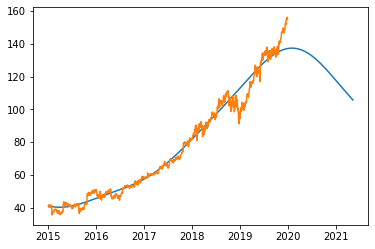

In [60]:
train_start_date = df.index[0].to_pydatetime()
train_end_date = df.index[-1].to_pydatetime()

import matplotlib.pyplot as plt

# adj close prediction
y_pred = predict_range_v2(train_start_date, train_end_date + timedelta(days=500))


plt.plot(y_pred)
plt.plot(y_train)
plt.show()